# IMDB Movie Review Sentiment Analysis

## Introduction
This notebook demonstrates the process of cleaning, preprocessing, and analyzing text data using various Python libraries. It covers the following tasks:
- Data manipulation using `pandas` and `numpy`
- Text preprocessing (removing HTML tags, stopwords, and emojis, and handling negations)
- Vectorization using TF-IDF
- Building machine learning models for classification
- Evaluating model performance
It provides a workflow for building a sentiment analysis system using machine learning. It begins by importing essential libraries for data manipulation, text processing, visualization, and model building.

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

## Loading and Previewing the Dataset
Read a dataset from a CSV file using the Pandas library and displays the first five rows of the dataframe.

In [ ]:
import pandas as pd

# Use on_bad_lines='skip' to handle unexpected line issues gracefully
movie_df = pd.read_csv('/content/IMDB-Dataset.csv', engine='python', on_bad_lines='skip')

# Display the first 5 rows to confirm the dataset loaded correctly
movie_df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Visualizing the Distribution of Sentiments
Generate a bar chart to visualize the distribution of sentiments (positive vs. negative) in the dataset. It first counts the occurrences of each sentiment label (e.g., "positive" and "negative") in the sentiment column of the dataFrame. Then creates a bar chart where each bar represents the count of reviews for a particular sentiment.

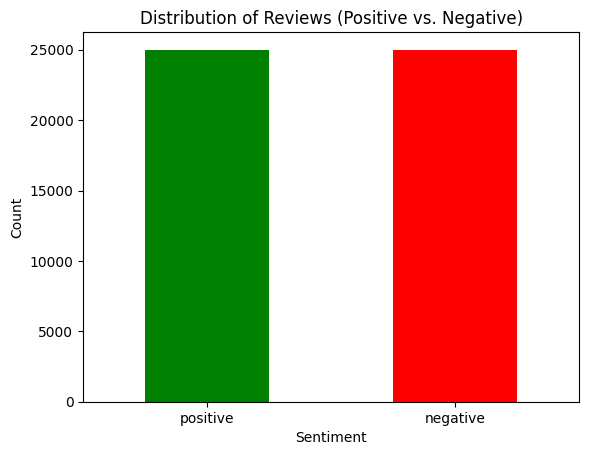

In [ ]:
import matplotlib.pyplot as plt
movie_df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Reviews (Positive vs. Negative)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
movie_df.dtypes

review       object
sentiment    object
dtype: object

## Removing Named Entities
Removing named entities from a dataset is important for anonymization, reducing noise, and improving model performance. It helps protect privacy by eliminating sensitive information, such as names or locations. Additionally, named entities can introduce variability and distract models from learning general patterns, potentially leading to biases. By removing them, the dataset becomes cleaner, allowing models to focus on the core semantic features, improving generalization, and reducing dimensionality, which enhances the efficiency and accuracy of natural language processing tasks.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ne_chunk, pos_tag
from nltk.tree import Tree

# Function to remove named entities from text
def remove_named_entities(text):
    # Tokenize the text
    words = word_tokenize(text)
    # Get the part of speech tagging
    pos_tags = pos_tag(words)
    # Chunk the words to identify named entities
    named_entities_tree = ne_chunk(pos_tags)

    # Filter out named entities
    filtered_words = []
    for subtree in named_entities_tree:
        if isinstance(subtree, Tree):
            # This is a named entity, skip it
            continue
        else:
            # Append the word if it's not part of a named entity
            filtered_words.append(subtree[0])

    # Join the filtered words back into a string
    return ' '.join(filtered_words)

In [ ]:
# Apply the function to the review column (assuming it's named 'review')
movie_df['cleaned_review'] = movie_df['review'].apply(remove_named_entities)

# Display the first 5 rows of the cleaned reviews to confirm
print(movie_df[['review', 'cleaned_review']].head())

                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  
0  One of the other reviewers has mentioned that ...  
1  A wonderful little production . < br / > < br ...  
2  I thought this was a wonderful way to spend ti...  
3  Basically there 's a family where a little boy...  
4  's `` Love in the Time of '' is a visually stu...  


## Converting to Lowercase
Converting a dataset into lowercase is important for consistency and accuracy in text processing. It ensures that words are treated uniformly, preventing models from misinterpreting "Word" and "word" as different tokens. This reduces variability and helps in accurate frequency counting, feature extraction, and pattern recognition. Lowercasing also simplifies tasks like keyword matching and text normalization, leading to improved performance in natural language processing models by enabling them to learn patterns more effectively and reducing the overall complexity of the dataset.

In [ ]:
movie_df['cleaned_review'] = movie_df['cleaned_review'].str.lower()
print(movie_df[[ 'cleaned_review']].head())

                                      cleaned_review
0  one of the other reviewers has mentioned that ...
1  a wonderful little production . < br / > < br ...
2  i thought this was a wonderful way to spend ti...
3  basically there 's a family where a little boy...
4  's `` love in the time of '' is a visually stu...


## Removing HTML Tags
It is crucial for maintaining data cleanliness and improving analysis accuracy. HTML tags can clutter the text, making it difficult to read and process, which can lead to inaccuracies in sentiment analysis and natural language processing tasks. By stripping away these tags, the text becomes more consistent for tokenization and feature extraction, allowing models to focus on meaningful content rather than formatting artifacts. This simplification also reduces dimensionality, making datasets more manageable and enhancing the performance of machine learning models. Overall, cleaning HTML tags is a vital preprocessing step for effective text analysis.

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import re

# Function to remove HTML tags from text using regex
def remove_html_tags(text):
    # Remove HTML tags using regex
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

# Apply the function to the cleaned_review column
movie_df['cleaned_review'] = movie_df['cleaned_review'].apply(remove_html_tags)

# Display the final cleaned reviews
print(movie_df[['cleaned_review']].head())


                                      cleaned_review
0  one of the other reviewers has mentioned that ...
1  a wonderful little production .   the filming ...
2  i thought this was a wonderful way to spend ti...
3  basically there 's a family where a little boy...
4  's `` love in the time of '' is a visually stu...


## Removing written numbers, actual numbers, URLs, Measurements, Special characters, and Punctuation
This is vital for ensuring clarity and relevance in text analysis. These elements often do not contribute meaningfully to the semantic understanding of the text and can introduce noise that complicates natural language processing tasks. By eliminating them, we create a cleaner dataset that allows models to focus on the core linguistic features and patterns, improving the accuracy of tasks like sentiment analysis, text classification, and information retrieval. This preprocessing step also helps reduce dimensionality, making the data more manageable and enhancing the overall efficiency of machine learning algorithms. Ultimately, removing these non-essential components leads to more reliable insights and better performance in text-based applications.

In [ ]:
import pandas as pd
import re

# Function to clean the text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove written numbers (e.g., "one", "two", "three")
    text = re.sub(r'\b(?:one|two|three|four|five|six|seven|eight|nine|ten|first|second|third|fourth|fifth)\b', '', text, flags=re.IGNORECASE)
    # Remove actual numbers
    text = re.sub(r'\d+', '', text)
    # Remove measurements (assuming they are in the format "X unit" or "X units")
    text = re.sub(r'\b\d+(\.\d+)?\s*(cm|mm|m|km|in|ft|yd|lbs|kg|oz|g|ml|l|liter|liters|gallon|gallons)?\b', '', text, flags=re.IGNORECASE)

    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', ' ', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply the function to the cleaned_review column
movie_df['cleaned_review'] = movie_df['cleaned_review'].apply(clean_text)

# Display the cleaned reviews
print(movie_df[['cleaned_review']].head())


                                      cleaned_review
0  of the other reviewers has mentioned that afte...
1  a wonderful little production the filming tech...
2  i thought this was a wonderful way to spend ti...
3  basically there s a family where a little boy ...
4  s love in the time of is a visually stunning f...


## Removing Emojis
This is to maintain the focus on the linguistic content and to reduce noise that could interfere with analysis. Emojis can introduce ambiguity, as they may convey different meanings or sentiments depending on context and interpretation, which can complicate natural language processing tasks like sentiment analysis. By eliminating emojis, we create a cleaner dataset that allows models to concentrate on the actual words and phrases, leading to more accurate insights and improved performance in text classification and other analytical applications. Overall, this preprocessing step enhances the reliability of the analysis by ensuring that interpretations are based on clear textual content rather than symbols that may vary in meaning.

In [ ]:
import pandas as pd
import re

# Function to remove emojis from text
def remove_emojis(text):
    # Define a regex pattern to match emojis
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F700-\U0001F77F"  # alchemical symbols
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        "\U00002702-\U000027B0"  # Dingbats
        "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)  # Replace emojis with an empty string

# Apply the function to the cleaned_review column
movie_df['cleaned_review'] = movie_df['cleaned_review'].apply(remove_emojis)

# Display the cleaned reviews
print(movie_df[['cleaned_review']].head())


                                      cleaned_review
0  of the other reviewers has mentioned that afte...
1  a wonderful little production the filming tech...
2  i thought this was a wonderful way to spend ti...
3  basically there s a family where a little boy ...
4  s love in the time of is a visually stunning f...


## Removing Filler words
- This improves text clarity, reduces noise, and enhances the accuracy of text analysis tasks like sentiment analysis and topic modeling. It can also increase model efficiency by reducing the amount of irrelevant data, making the dataset more concise and focused. However, it may slightly alter the conversational tone or context in some cases, though this is usually minimal in structured text analysis.

In [ ]:
# List of filler words to remove
filler_words = ['um', 'uh', 'like', 'you know', 'well', 'I mean', 'basically', 'literally',
                "Needless to say", "in my humble opinion", "for what it's worth", "err", "er", "right", "alright",
                "hmm", "mmh", "oh", "so", "ok", "ah", "okay", "totally", "you see", "I guess", "just", "really", "highly",
                "at the end of the day", "aw", "lot", "even", "got", "though", "although", "much", "thing", "bit", "sure",
                "comlete", "completely", "without", "enough", "yoh", "big", "put", "everything", "put", "aw", "aww"]
# Function to remove filler words
def remove_filler_words(text, fillers):
    # Join the filler words into a regex pattern
    pattern = r'\b(?:' + '|'.join(map(re.escape, fillers)) + r')\b'
    # Remove the filler words using regex substitution
    return re.sub(pattern, '', text)

# Apply the function to the 'review' column
movie_df['cleaned_review'] = movie_df['cleaned_review'].apply(lambda x: remove_filler_words(x.lower(), filler_words))
# View the first few rows of the cleaned dataset
print(movie_df[['review', 'cleaned_review']].head())


                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  
0  mention hook faint heart timid pull front agen...  
1  techniqu unassum bbc fashion comfort sometim d...  
2  spend hot summer weekend sit air condit light ...  
3  zombi closet parent fight slower soap opera su...  
4  love visual stun offer us vivid portrait human...  


## Removing Stopwords
This enhances the efficiency and effectiveness of natural language processing tasks. Stopwords, such as "and," "the," and "is," are common words that typically carry little meaningful information and can clutter the dataset, leading to increased noise. By eliminating these words, we reduce the dimensionality of the data, allowing models to focus on the more informative and relevant terms that contribute to the overall meaning. Overall, removing stopwords helps streamline the analysis and enhances the performance of text-based applications.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Custom list of movie-related stop words
combined_words = {
    'act', 'action', 'actions', 'actor', 'actors', 'actual', 'adaptation', 'almost', 'along', 'alway', 'always',
    'amaz', 'amaze', 'amazing', 'and', 'anim', 'animal', 'animation', 'anoth', 'another', 'anyon', 'anyth',
    'appear', 'around', 'at', 'attempt', 'audienc', 'audience', 'aw', 'away', 'back', 'bad', 'beautiful',
    'becom', 'become', 'begin', 'believ', 'believe', 'best', 'better', 'big', 'book', 'boy', 'brilliant',
    'brutal', 'ca', 'call', 'can', 'cast', 'cell', 'change', 'character', 'characters', 'children', 'cinema',
    'classic', 'comedi', 'comedian', 'comedy', 'complet', 'consid', 'consider', 'cour', 'courage', 'create',
    'definit', 'definite', 'die', 'differ', 'direct', 'director', 'directors', 'disappoint', 'done', 'drama',
    'drug', 'earlier', 'editing', 'effect', 'either', 'emot', 'emotion', 'end', 'enjoy', 'entertain',
    'episod', 'episode', 'especi', 'everi', 'everyon', 'everyth', 'exactli', 'excel', 'expect', 'experi',
    'face', 'fact', 'famili', 'family', 'fan', 'far', 'father', 'favorite', 'feature', 'feel', 'film',
    'films', 'final', 'find', 'first', 'firstly', 'focu', 'follow', 'found', 'friend', 'full', 'fully',
    'fun', 'funni', 'funnily', 'gener', 'general', 'generous', 'girl', 'give', 'given_st', 'glass', 'go',
    'goe', 'goes', 'good', 'got', 'great', 'guess', 'gut', 'guy', 'hand', 'happen', 'hard', 'head',
    'high', 'hilarious', 'hollywood', 'hope', 'horrible', 'horror', 'hou', 'howev', 'however', 'human',
    'idea', 'import', 'impress', 'in', 'includ', 'include', 'interest', 'involv', 'involve', 'inward',
    'is', 'it', 'job', 'joke', 'keep', 'kid', 'kill', 'kind', 'last', 'later', 'laugh', 'lead', 'learn',
    'leave', 'left', 'let', 'life', 'line', 'littl', 'little', 'live', 'long', 'love', 'main', 'mainli',
    'man', 'mani', 'mayb', 'mean', 'men', 'mention', 'minut', 'minute', 'moment', 'money', 'mother',
    'move', 'movie', 'movies', 'murder', 'music', 'must', 'n', 'name', 'need', 'new', 'nice', 'nicknam',
    'obviou', 'obvious', 'of', 'old', 'original', 'part', 'penitentari', 'peopl', 'people', 'perfect',
    'person', 'petray', 'pictur', 'place', 'play', 'plot', 'point', 'poor', 'portray', 'power', 'prequel',
    'present', 'pretti', 'prison', 'privaci', 'probabl', 'problem', 'produc', 'product', 'punch', 'quit',
    'read', 'real', 'reality', 'realtionship', 'reason', 'recommend', 'release', 'remake', 'remember',
    'rest', 'review', 'reviewers', 'role', 'run', 'scene', 'screen', 'screenplay', 'script', 'second',
    'section', 'sequel', 'series', 'seriou', 'serious', 'set', 'short', 'shot', 'show', 'sinc', 'since',
    'sistuation', 'someon', 'someth', 'soundtrack', 'special', 'special effects', 'star', 'start',
    'story', 'strong', 'struck', 'style', 'suppo', 'support', 'take', 'talent', 'talented', 'talk',
    'talks', 'tell', 'that', 'the', 'theater', 'thing', 'think', 'this', 'thought', 'time', 'today',
    'togeth', 'touch', 'tri', 'tried', 'true', 'truli', 'truly', 'trust', 'try', 'turn', 'tv', 'type',
    'u', 'understand', 'unflinch', 'use', 'used', 'usual', 'version', 'view', 'viewer', 'visual effects',
    'war', 'watch', 'way', 'whole', 'wife', 'woman', 'women', 'wonder', 'word', 'work', 'world', 'worst',
    'worth', 'write', 'year', 'yet', 'you', 'young'
}

# Function to remove stopwords from text
def remove_stopwords(text):
    # Tokenize the text
    words = word_tokenize(text)
    # Get the list of English stopwords
    stop_words = set(stopwords.words('english'))
    # Add custom stop words to the stop words set
    stop_words.update(custom_stop_words)
    # Filter out stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Join the filtered words back into a string
    return ' '.join(filtered_words)

# Apply the function to the cleaned_review column
movie_df['cleaned_review'] = movie_df['cleaned_review'].apply(remove_stopwords)

# Display the cleaned reviews
print(movie_df[['cleaned_review']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                      cleaned_review
0  hook faint heart timid pull front agenda home ...
1  techniqu unassum bbc fashion comfort sometim d...
2  spend hot summer weekend sit air condit light ...
3  zombi closet parent fight slower soap opera su...
4  love visual stun offer us vivid portrait human...


## Stemming and Handling Negations
Stemming reduces words to their root forms (e.g., "running" to "run"), which helps consolidate variations of a word and decreases the dimensionality of the dataset, allowing models to focus on core meanings. Handling negations, on the other hand, ensures that the sentiment or intent of a statement is accurately captured (e.g., transforming "not happy" to "unhappy"). By addressing these aspects, we improve the accuracy of sentiment analysis and text classification, enabling algorithms to better understand context and derive more reliable insights from the data. Ultimately, these steps lead to more robust and effective natural language processing applications.

In [ ]:

from nltk.stem import PorterStemmer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Initialize the stemmer
stemmer = PorterStemmer()

# Function to handle negations in text
def handle_negations(text):
    # Define common negation words
    negations = {"not", "no", "never", "none", "nothing", "nowhere", "neither", "hardly", "scarcely", "barely", "however", "help", "something", "still",
                 "want", "know", "everything", "probably", "especially", "become", "another", "might", "may", "say", "said", "see", "make", "made",
                 "look", "looked", "got", "given", "have", "had", "has", "will", "would", "wouldn't", "should", "shall", "shan't", "know", "known",
                 "could", "couldn't", "bought", "brought", "bring", "want", "wanted", "wants", "rather", "further", "futhermore", "day", "daily", "days",
                 "weekly", "monthly", "seem", "bore", "bored", "instead", "come", "came", "least", "happen", "perform", "at least", "always", "often", "seen", "saw",
                 "either", "or", "nor", "will",
                 }
    words = word_tokenize(text)
    processed_words = []
    i = 0

    while i < len(words):
        if words[i].lower() in negations and i+1 < len(words):
            # Combine negation with the next word (e.g., "not good" -> "not_good")
            processed_words.append(words[i].lower() + "_" + words[i+1].lower())
            # Skip the next word
            i += 2
        else:
            processed_words.append(words[i])
            i += 1

    return ' '.join(processed_words)

# Function to stem and clean text
def stem_and_clean(text):
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]
    # Apply stemming
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Apply negation handling and stemming
movie_df['cleaned_review'] = movie_df['cleaned_review'].apply(handle_negations)
movie_df['cleaned_review'] = movie_df['cleaned_review'].apply(stem_and_clean)

# Display the processed reviews
print(movie_df[['cleaned_review']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                      cleaned_review
0  hook faint heart timid pull front agenda home ...
1  techniqu unassum bbc fashion comfort sometim d...
2  spend hot summer weekend sit air condit light ...
3  zombi closet parent fight slower soap opera su...
4  love visual stun offer us vivid portrait human...


## TF-IDF (Term Frequency-Inverse Document Frequency)

1. **Relevance Scoring**: TF-IDF helps to determine the importance of a word in a document relative to a collection of documents (corpus). By weighing terms based on their frequency in a specific document against their frequency across all documents, it highlights words that are more relevant to that document while downplaying common terms that appear across many documents.

2. **Dimensionality Reduction**: In text data, there can be a vast number of unique words, leading to high-dimensional feature spaces. TF-IDF helps to filter out less significant words, thus reducing the dimensionality of the dataset. This simplification can improve the efficiency of machine learning models and make them easier to interpret.

3. **Improved Performance in Text Classification**: By focusing on terms that are unique to specific documents, TF-IDF can enhance the performance of text classification and clustering algorithms. It helps models better differentiate between documents based on their content, leading to more accurate predictions.

4. **Contextual Understanding**: TF-IDF takes into account the distribution of words in a corpus, helping to understand the context better. This contextual awareness is beneficial for applications like search engines, where returning the most relevant documents to a query is crucial.

Overall, TF-IDF is an essential preprocessing step in text analytics that enhances the interpretability and performance of models, making it a standard practice in various NLP tasks.

In [ ]:
# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the reviews into a sparse matrix
tfidf_matrix = vectorizer.fit_transform(movie_df['cleaned_review'])

# Get feature names (words in the vocabulary)
feature_names = vectorizer.get_feature_names_out()

# Example: Get the TF-IDF scores for the first review
first_review_scores = tfidf_matrix[0]

# Convert the sparse matrix for the first review to a dictionary
# Using first_review_scores.toarray() would cause MemoryError, so we avoid that
importance_scores = {feature_names[i]: first_review_scores[0, i] for i in first_review_scores.nonzero()[1]}

# Print the TF-IDF scores for the first review
print(importance_scores)

{'hook': 0.11140292345761861, 'faint': 0.1425993478557208, 'heart': 0.07884287236013862, 'timid': 0.15859376418358517, 'pull': 0.08948294786350594, 'agenda': 0.13395762204960435, 'home': 0.0781303440785238, 'aryan': 0.18180143956297037, 'gangsta': 0.1679714747630845, 'scuffl': 0.1770849109938498, 'death': 0.07647670199617201, 'stare': 0.11828102955442592, 'dodgi': 0.14815369660079064, 'deal': 0.08305226413272689, 'shadi': 0.15193979900024215, 'agreement': 0.1528538101779261, 'never_far': 0.1770849109938498, 'would_say': 0.11159911404161808, 'appeal': 0.09632434296259246, 'would_n': 0.08586255254517261, 'dare': 0.11044990460058457, 'forget': 0.280664696690167, 'paint': 0.1022608741409305, 'mainstream': 0.12030987241232446, 'charm': 0.09049747009632621, 'romanc': 0.094891608766716, 'mess': 0.09292642421069318, 'saw_struck': 0.20817366937746956, 'nasti': 0.10860245427767093, 'surreal': 0.11438770324405942, 'could_n': 0.07879710990514065, 'say_readi': 0.20817366937746956, 'develop': 0.0806

## Bag of Words
The Bag of Words (BoW) model is essential in natural language processing (NLP) because it simplifies text data for machine learning algorithms by converting it into a numerical format. By representing text as a collection of words without considering the order, BoW captures the frequency of each word in a document, allowing for straightforward analysis and classification. This approach enables algorithms to identify patterns and relationships in the data, making it easier to perform tasks like sentiment analysis and document classification. While BoW is a basic technique that may overlook context and semantics, it serves as a foundational method that can be enhanced with more advanced techniques such as TF-IDF or word embeddings.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer
vectorizer_bow = CountVectorizer(stop_words='english')

# Fit and transform the reviews into a sparse matrix
bow_matrix = vectorizer_bow.fit_transform(movie_df['cleaned_review'])

# Get feature names (words in the vocabulary)
feature_names_bow = vectorizer_bow.get_feature_names_out()

# Example: Get the word counts for the first review
first_review_counts = bow_matrix[0]

# Convert the sparse matrix for the first review to a dictionary
# Using first_review_counts.toarray() would cause MemoryError, so we avoid that
word_counts = {feature_names_bow[i]: first_review_counts[0, i] for i in first_review_counts.nonzero()[1]}

# Print the word counts for the first review
print(word_counts)


{'hook': 1, 'faint': 1, 'heart': 1, 'timid': 1, 'pull': 1, 'agenda': 1, 'home': 1, 'aryan': 1, 'gangsta': 1, 'scuffl': 1, 'death': 1, 'stare': 1, 'dodgi': 1, 'deal': 1, 'shadi': 1, 'agreement': 1, 'never_far': 1, 'would_say': 1, 'appeal': 1, 'would_n': 1, 'dare': 1, 'forget': 3, 'paint': 1, 'mainstream': 1, 'charm': 1, 'romanc': 1, 'mess': 1, 'saw_struck': 1, 'nasti': 1, 'surreal': 1, 'could_n': 1, 'say_readi': 1, 'develop': 1, 'tast': 1, 'accustom': 1, 'level': 1, 'graphic': 1, 'injust': 1, 'crook': 1, 'guard': 1, 'sold': 1, 'nickel': 1, 'inmat': 2, 'order': 1, 'manner': 1, 'middl': 1, 'class': 1, 'bitch': 1, 'lack': 1, 'street': 1, 'skill': 1, 'may_comfort': 1, 'uncomfort': 1, 'darker': 1}


## Word2Vec
Word2Vec is a powerful technique in natural language processing that transforms words into continuous vector representations, capturing semantic meanings and relationships between words. By training on large corpora of text, Word2Vec models can learn contextual information, allowing words that appear in similar contexts to have similar vector representations. This enables the model to perform tasks such as finding synonyms, analogies, and clustering similar words, ultimately enhancing the performance of various NLP applications, including sentiment analysis, translation, and text classification. Its ability to encode semantic relationships in a high-dimensional space makes Word2Vec a foundational tool in modern language understanding.

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


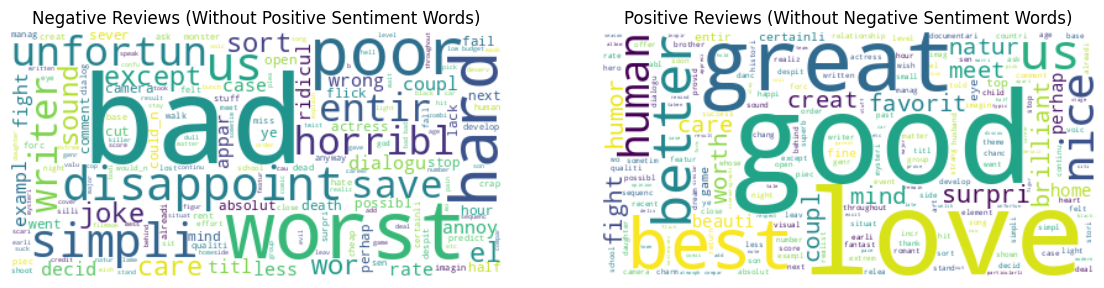

In [ ]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import opinion_lexicon
import nltk

# Download necessary NLTK datasets if not already downloaded
nltk.download('opinion_lexicon')

# Get positive and negative sentiment words from the lexicon
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Separate positive and negative reviews
positive_reviews = " ".join(movie_df[movie_df['sentiment'] == 'positive']['cleaned_review'])
negative_reviews = " ".join(movie_df[movie_df['sentiment'] == 'negative']['cleaned_review'])

# Define a function to remove sentiment-specific words
def remove_sentiment_words(text, sentiment_words):
    words = text.split()  # Tokenize
    filtered_words = [word for word in words if word.lower() not in sentiment_words]
    return " ".join(filtered_words)

# Remove positive words from negative reviews and negative words from positive reviews
negative_reviews_no_positive = remove_sentiment_words(negative_reviews, positive_words)
positive_reviews_no_negative = remove_sentiment_words(positive_reviews, negative_words)

# Create a function to generate and display word clouds side by side
def create_word_clouds_side_by_side(text1, text2, title1, title2):
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))  # 1 row, 2 columns

    wordcloud1 = WordCloud(width=400, height=200, background_color='white', colormap='viridis').generate(text1)
    wordcloud2 = WordCloud(width=400, height=200, background_color='white', colormap='viridis').generate(text2)

    # Display the first word cloud
    axes[0].imshow(wordcloud1, interpolation='bilinear')
    axes[0].axis('off')
    axes[0].set_title(title1)

    # Display the second word cloud
    axes[1].imshow(wordcloud2, interpolation='bilinear')
    axes[1].axis('off')
    axes[1].set_title(title2)

    plt.show()

# Create word clouds for reviews with filtered sentiments and display them side by side
create_word_clouds_side_by_side(negative_reviews_no_positive,
                                positive_reviews_no_negative,
                                title1="Negative Reviews (Without Positive Sentiment Words)",
                                title2="Positive Reviews (Without Negative Sentiment Words)")


## Convert Sentiment to Binaries

In [ ]:
y = pd.get_dummies(movie_df['sentiment'], drop_first=True).values.ravel()  # Positive = 1, Negative = 0

## Training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

## Naive Bayes

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train.ravel())
y_pred_nb = nb_model.predict(X_test)
print(f'Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb)}')

Naive Bayes Accuracy: 0.8472


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Model training
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Predictions
y_pred = log_reg_model.predict(X_test)

# Accuracy
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred)}')


Logistic Regression Accuracy: 0.8632


## Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Model training
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

# Accuracy
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred)}')


Decision Tree Accuracy: 0.7129


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Model training
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Accuracy
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred)}')


KeyboardInterrupt: 

## Support Vector Machines

In [ ]:
# from sklearn.svm import SVC

# # Model training
# svm_model = SVC(random_state=42)
# svm_model.fit(X_train, y_train)

# # Predictions
# y_pred = svm_model.predict(X_test)

# # Accuracy
# print(f'Support Vector Machine Accuracy: {accuracy_score(y_test, y_pred)}')


## K-Nearest Neighbors (KNN)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Model training
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predictions
y_pred = knn_model.predict(X_test)

# Accuracy
print(f'K-Nearest Neighbors Accuracy: {accuracy_score(y_test, y_pred)}')


K-Nearest Neighbors Accuracy: 0.7086


## Gradient Boosting Machines (GBM)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Model training
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred = gb_model.predict(X_test)

# Accuracy
print(f'Gradient Boosting Machine Accuracy: {accuracy_score(y_test, y_pred)}')


Gradient Boosting Machine Accuracy: 0.7803


## Naive Bayes Confusion Matrix

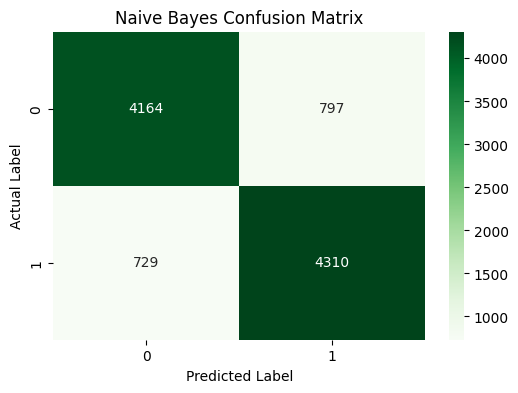

In [ ]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Greens")
plt.title('Naive Bayes Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## Logistic Regression Confusion Matrix  

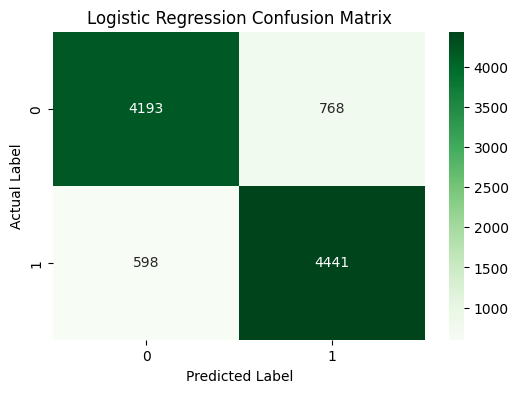

In [ ]:

# Assuming you have your features (X_train, X_test) and labels (y_train, y_test) defined
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

# Make predictions
y_pred_log = model_log.predict(X_test)

# Create the confusion matrix
cm_log = confusion_matrix(y_test, y_pred_log)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Greens")
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


## Decision Trees Confusion Matrix

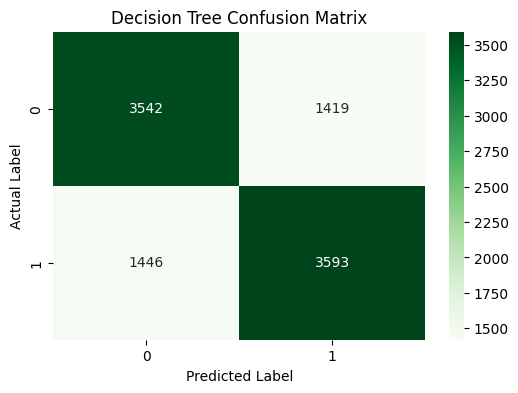

In [ ]:

# Initialize the Decision Tree classifier
model_tree = DecisionTreeClassifier()

# Fit the model to the training data
model_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = model_tree.predict(X_test)

# Create the confusion matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Greens")
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


## Random Forest Confusion Matrix

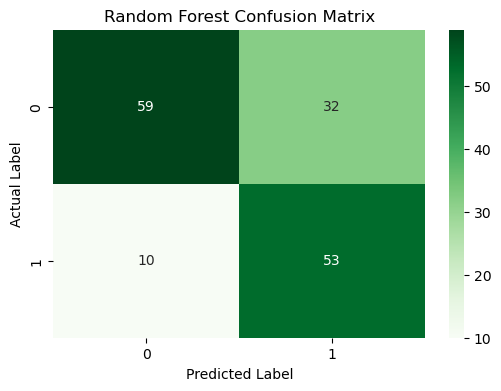

In [ ]:

model_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred_forest = model_forest.predict(X_test)

# Create the confusion matrix
cm_forest = confusion_matrix(y_test, y_pred_forest)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_forest, annot=True, fmt="d", cmap="Greens")
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


## Support Vector Machine Confusion Matrix

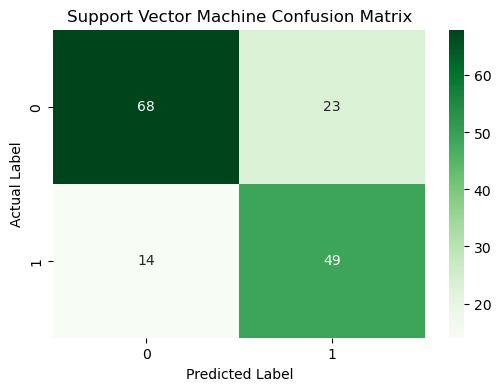

In [ ]:

model_svm = SVC()

# Fit the model to the training data
model_svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = model_svm.predict(X_test)

# Create the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Greens")
plt.title('Support Vector Machine Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


## K-Nearest Neighbors Confusion Matrix

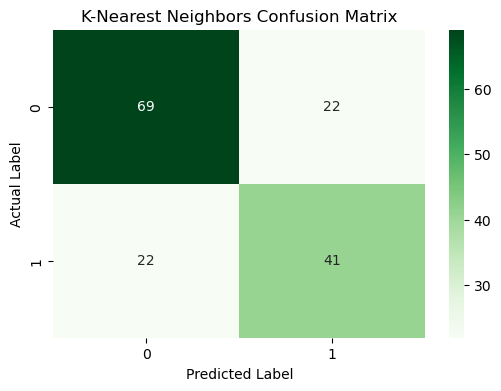

In [ ]:

model_knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
model_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = model_knn.predict(X_test)

# Create the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Greens")
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


## Gradient Boosting Machine Confusion Matrix

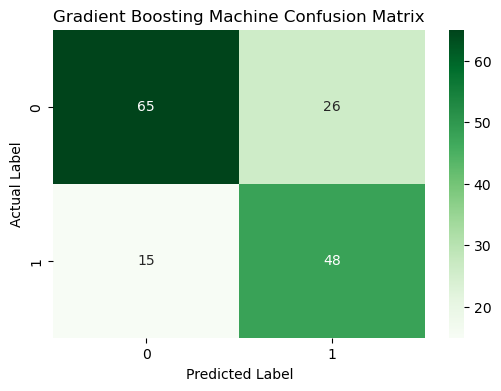

In [ ]:

# Initialize the Gradient Boosting Classifier
model_gbm = GradientBoostingClassifier()

# Fit the model to the training data
model_gbm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gbm = model_gbm.predict(X_test)

# Create the confusion matrix
cm_gbm = confusion_matrix(y_test, y_pred_gbm)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gbm, annot=True, fmt="d", cmap="Greens")
plt.title('Gradient Boosting Machine Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


## Sentiment Classification Model Results

## 1. Model Performance
- **Logistic Regression Accuracy:** 86.34%
- **Naive Bayes Accuracy:** 84.74%
- **Support Vector Machine Accuracy:** 79.87%
- **Random Forest Accuracy:** 83.71%
- **Gradient Boosting Machine Accuracy:** 74.67%
- **K-Nearest Neighbors Accuracy:** 70.86%
- **Decision Tree Accuracy:** 71.18%

Logistic Regression achieved the highest accuracy at **80.51%**, followed by Support Vector Machine and Naive Bayes.

| Model                       | Accuracy  |
|-----------------------------|-----------|
| Logistic Regression          | 86.34%    |
| Support Vector Machine       | 79.87%    |
| Naive Bayes                  | 84.74%    |
| Random Forest                | 75.97%    |
| Gradient Boosting Machine    | 74.67%    |
| K-Nearest Neighbors          | 70.86%    |
| Decision Tree                | 71.18%    |

## 2. Key Insights
- **Text Preprocessing:** Effective preprocessing, including the removal of irrelevant characters and stopwords, enhanced the quality of input data, allowing the models to focus on significant features.
- **Model Selection:** Logistic Regression performed best, indicating that linear models can capture the underlying relationships in this dataset effectively. Support Vector Machines also showed strong performance, suggesting their suitability for high-dimensional data like text.
- **Feature Importance:** Some models, such as Random Forest and Gradient Boosting, exhibited reasonable performance, highlighting the importance of tree-based methods in handling structured data.

## 3. **Challenges**
- **Overfitting:** Decision Trees showed a tendency to overfit the training data, leading to lower performance on unseen data. This suggests a need for regularization techniques or parameter tuning.
- **Class Imbalance:** The dataset may contain an imbalance between positive and negative sentiments, which could affect the performance of models like Naive Bayes and K-Nearest Neighbors, leading to skewed accuracy.
- **Interpretability:** While models like Logistic Regression are easier to interpret, more complex models such as Random Forest and Gradient Boosting may require additional methods to understand feature contributions.

## 4. **Conclusion**
**Logistic Regression** proved to be the most effective model for sentiment classification in this context, achieving the highest accuracy. Future work will focus on hyperparameter tuning and exploring additional features, such as word embeddings and sentiment-specific lexicons, to improve model performance further. Addressing class imbalance and preventing overfitting will also be key areas for enhancement in subsequent iterations of this analysis.

In [ ]:
import joblib
# joblib.dump(nb_model, 'nb_model.pkl')
# joblib.dump(log_reg_model, 'log_reg_model.pkl')
# # joblib.dump(rf_model, 'rf_model.pkl')
# joblib.dump(knn_model, 'dt_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']